In [166]:
# Fireforest Excercise

In [152]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler 

In [153]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
df = pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [154]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

df['month']= label_encoder.fit_transform(df['month']) 

df['day']= label_encoder.fit_transform(df['day']) 

df['size_category']= label_encoder.fit_transform(df['size_category']) 

In [155]:
X = df[0:31]
Y = df[:31]

In [156]:
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X) 

In [157]:
pd.DataFrame(X_standardized).describe() 
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [158]:
# create model
model = Sequential()
model.add(Dense(12, input_dim= 31, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(31, kernel_initializer='uniform', activation='sigmoid'))

In [159]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [160]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
2/2 [==============================] - 1s 343ms/step - loss: 0.0664 - acc: 0.0000e+00 - val_loss: -0.5125 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 0s 49ms/step - loss: -0.2970 - acc: 0.4000 - val_loss: -1.0446 - val_acc: 0.9091
Epoch 3/150
2/2 [==============================] - 0s 50ms/step - loss: -0.6889 - acc: 0.8500 - val_loss: -1.6220 - val_acc: 0.9091
Epoch 4/150
2/2 [==============================] - 0s 44ms/step - loss: -1.0901 - acc: 0.8500 - val_loss: -2.2717 - val_acc: 0.9091
Epoch 5/150
2/2 [==============================] - 0s 49ms/step - loss: -1.5724 - acc: 0.8500 - val_loss: -3.0128 - val_acc: 0.9091
Epoch 6/150
2/2 [==============================] - 0s 47ms/step - loss: -2.1718 - acc: 0.8000 - val_loss: -3.8719 - val_acc: 0.9091
Epoch 7/150
2/2 [==============================] - 0s 52ms/step - loss: -2.8119 - acc: 0.7000 - val_loss: -4.8747 - val_acc: 0.9091
Epoch 8/150
2/2 [==============================] - 0s 46ms/step - lo

In [161]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

1/1 [==============================] - 0s 45ms/step - loss: -36336.1211 - acc: 0.9032
acc: 90.32%


In [162]:
# Visualize training history

# list all data in history
print(history.history.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [163]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

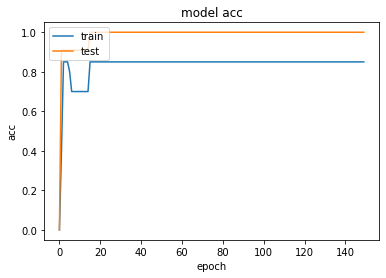

In [164]:
# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

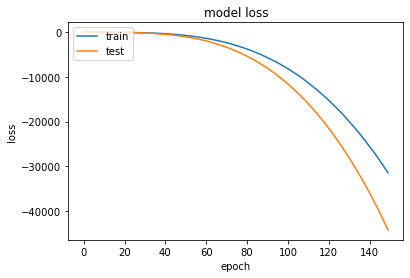

In [165]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()